**Welcome to this Notebook!**

UCLouvain - EPL - made by Justin Weeamels & Baptiste Sambon - 2023

*In this notebook, several plots are generated to compare the NOMA and CDMA systems.*

*As a first step, let's import some useful packages.* 

In [6]:
# Imports 

import numpy as np
import matplotlib.pyplot as plt
import plotly

*We can begin by comparing the BER performances of NOMA and CMDA systems with and without inter-cell-interference (ICI)*. 

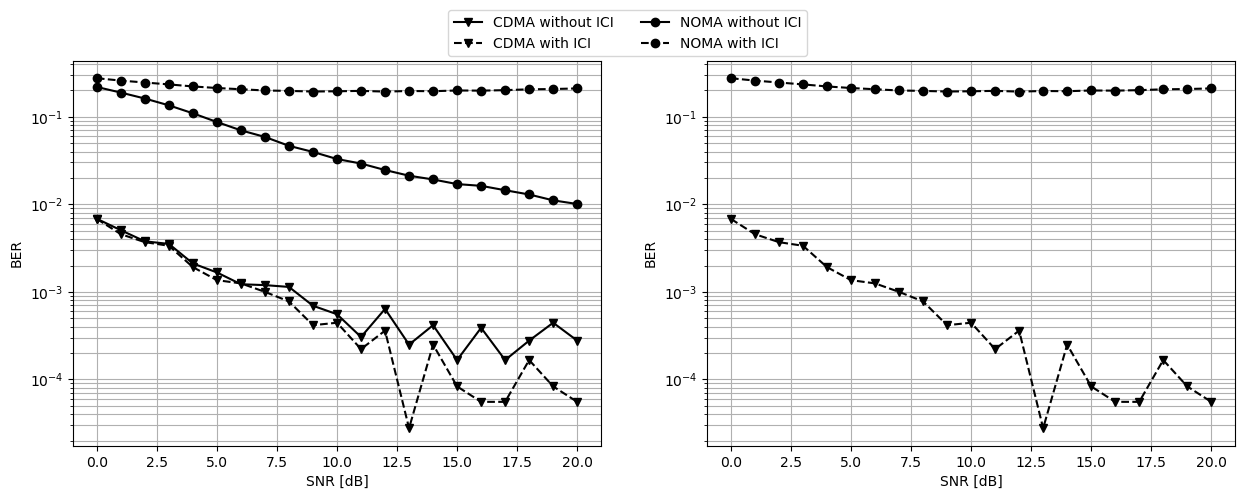

In [56]:
# Plot simple BER - SNR curves for CDMA and NOMA comparison

# Load the data
# CDMA
cdma_ber_without = np.load("data/CDMA/CDMA_without-ICI 2.npy")
cdma_ber_with = np.load("data/CDMA/CDMA_with-ICI 2.npy")
# NOMA
noma_ber_without = np.load("data/NOMA/BER_uncoded.npy")
noma_ber_with = np.load("data/NOMA/BER_uncoded_interf.npy")

snr_db = np.arange(0, 21, 1)

# Plot the data
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.semilogy(snr_db, cdma_ber_without, "v-", label="CDMA without ICI", color="black")
plt.semilogy(snr_db, cdma_ber_with, "v--",  label="CDMA with ICI", color="black")
plt.semilogy(snr_db, noma_ber_without, "o-", label="NOMA without ICI", color="black")
plt.semilogy(snr_db, noma_ber_with, "o--", label="NOMA with ICI", color="black")
plt.xlabel("SNR [dB]")
plt.ylabel("BER")
plt.legend(loc="upper center", bbox_to_anchor=(1.05, 1.15), ncol=2)
plt.grid(which="both")

plt.subplot(1, 2, 2)
plt.semilogy(snr_db, cdma_ber_with, "v--",  label="CDMA with ICI", color="black")
plt.semilogy(snr_db, noma_ber_with, "o--", label="NOMA with ICI", color="black")
plt.xlabel("SNR [dB]")
plt.ylabel("BER")
#plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.grid(which="both")

plt.savefig("data/Comparison/BER.pdf", format="pdf")
plt.show()


In [57]:
# Add the data to plotly

ratio_power_interf = np.load("data/Interference/ratio_power_interf.npy")

niters = 10000
interfs = np.zeros(niters)
for i in range(niters) : 
    interf = 1/np.random.choice(ratio_power_interf)
    interfs[i] = interf

print("Mean interference : ", np.mean(interfs))

Mean interference :  0.5050827650846597


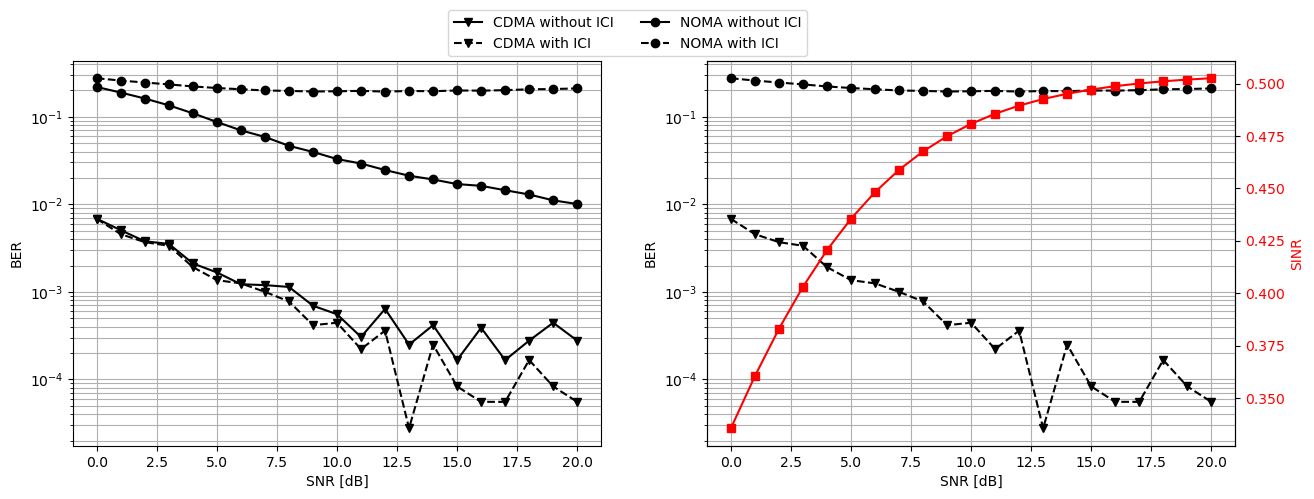

In [58]:
P_int  = 1/np.mean(interfs)
snr_db = snr_db = np.arange(0, 21, 1)
snr = 10**(snr_db/10)

var_noise = 1/(10**(0.1*snr_db))

sinr = 1/(var_noise + P_int)

ratio_sinr_snr = sinr

# Plot the data
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.semilogy(snr_db, cdma_ber_without, "v-", label="CDMA without ICI", color="black")
plt.semilogy(snr_db, cdma_ber_with, "v--",  label="CDMA with ICI", color="black")
plt.semilogy(snr_db, noma_ber_without, "o-", label="NOMA without ICI", color="black")
plt.semilogy(snr_db, noma_ber_with, "o--", label="NOMA with ICI", color="black")
plt.xlabel("SNR [dB]")
plt.ylabel("BER")
plt.legend(loc="upper center", bbox_to_anchor=(1.05, 1.15), ncol=2)
plt.grid(which="both")

plt.subplot(1, 2, 2)
ax1 = plt.gca()  # first y-axis for BER

plt.semilogy(snr_db, cdma_ber_with, "v--",  label="CDMA with ICI", color="black")
plt.semilogy(snr_db, noma_ber_with, "o--", label="NOMA with ICI", color="black")

# Plot the ratio on the second y-axis
ax2 = ax1.twinx()  # second y-axis for the ratio
ax2.plot(snr_db, ratio_sinr_snr, "s-", label="Ratio (SNR/SINR)", color="red")
#ax2.set_ylabel(r"$\frac{P_{\mathrm{interference}}}{P_{\mathrm{noise}}}$", color="red", fontsize=18, rotation=90)
ax2.set_ylabel(r"SINR", color="red",rotation=90)

ax2.tick_params(axis='y', labelcolor="red")

ax1.set_xlabel("SNR [dB]")
ax1.set_ylabel("BER")
ax1.grid(which="both")

plt.savefig("data/Comparison/BER_with_ratio.pdf", format="pdf")
plt.show()

*We can plot the BER as a function of the SNR for different values of the number of users per cell.*

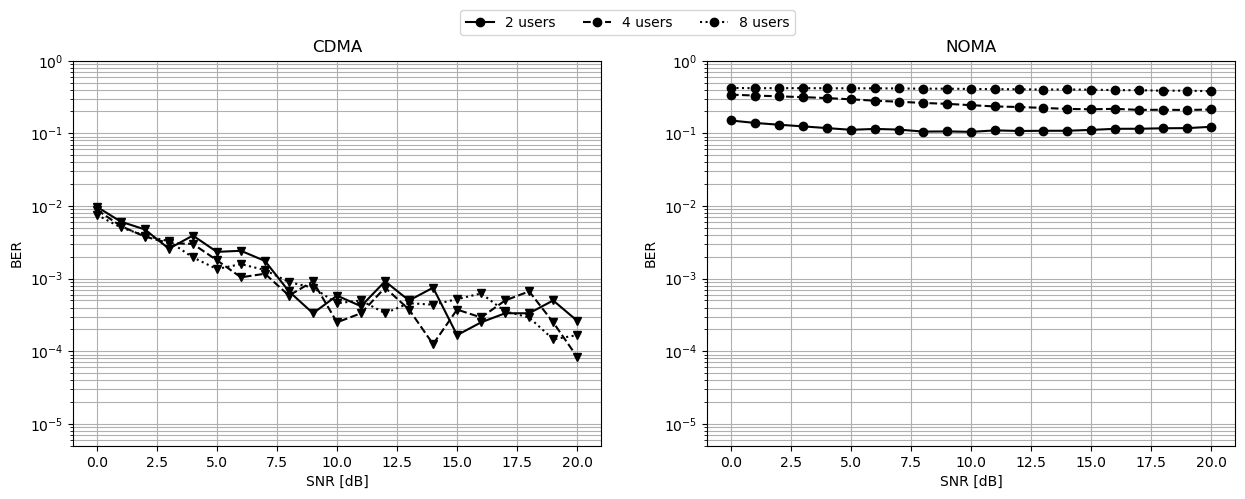

In [8]:
# Plot as a function of the number of users 

# Load the data
# CDMA
cdma_ber_2_users = np.load("data/CDMA/CDMA_UE-2.npy")
cdma_ber_4_users = np.load("data/CDMA/CDMA_UE-4.npy")
cdma_ber_8_users = np.load("data/CDMA/CDMA_UE-8.npy")
# NOMA
noma_ber_2_users = np.load("data/NOMA/BER_n_users.npy")[1]
noma_ber_4_users = np.load("data/NOMA/BER_n_users.npy")[2]
noma_ber_8_users = np.load("data/NOMA/BER_n_users.npy")[3]

# Plot the data
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.semilogy(snr_db, cdma_ber_2_users,  "v-", label="CDMA 2 users", color="black")
plt.semilogy(snr_db, cdma_ber_4_users,  "v--", label="CDMA 4 users", color="black")
plt.semilogy(snr_db, cdma_ber_8_users,  "v:", label="CDMA 8 users", color="black")
plt.xlabel("SNR [dB]")
plt.ylabel("BER")
plt.xscale("linear")
plt.yscale("log")
plt.ylim(bottom=0.5*1e-5, top=1)
plt.grid(which="both")
plt.title("CDMA")

plt.subplot(1, 2, 2)
plt.semilogy(snr_db, noma_ber_2_users,  "o-", label="2 users", color="black")
plt.semilogy(snr_db, noma_ber_4_users,  "o--", label="4 users", color="black")
plt.semilogy(snr_db, noma_ber_8_users,  "o:", label="8 users", color="black")
plt.xlabel("SNR [dB]")
plt.ylabel("BER")
plt.xscale("linear")
plt.yscale("log")
plt.ylim(bottom=0.5*1e-5, top=1)
plt.grid(which="both")
plt.title("NOMA")
plt.legend(loc="upper center", bbox_to_anchor=(-0.15, 1.15), ncol=3)

plt.savefig("data/Comparison/BER_n_users.pdf", format="pdf")
plt.show()


*We can also plit the spectral efficiency as a function of the SNR with and without considering obstacles.*

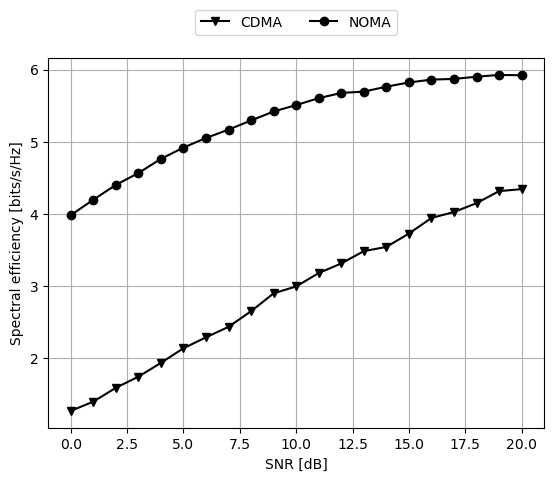

In [68]:
# Plot spectral efficiency 

# Load data 
# CDMA 
spectral_efficiency_cdma = np.load("data/Comparison/CDMA_spectr-eff 2.npy")
# NOMA
spectral_efficiency_noma = np.load("data/NOMA/spectral_efficiency.npy")

# Plot the data
plt.figure()
plt.plot(snr_db, spectral_efficiency_cdma,  "v-", label="CDMA", color="black")
plt.plot(snr_db, spectral_efficiency_noma,  "o-", label="NOMA", color="black")
plt.xlabel("SNR [dB]")
plt.ylabel("Spectral efficiency [bits/s/Hz]")
plt.grid(which="both")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.savefig("data/Comparison/spectral_efficiency.pdf", format="pdf")
plt.show()

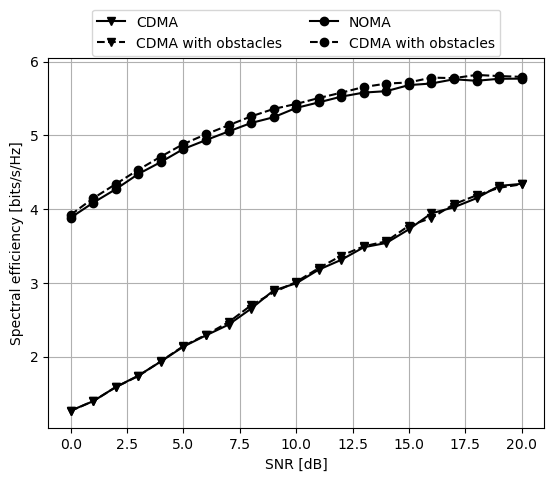

In [67]:
# Plot spectral efficiency 

# Load data 
# CDMA 
spectral_efficiency_cdma = np.load("data/Comparison/CDMA_spectr-eff 2.npy")
spectral_efficiency_cmda_obstacle = np.load("data/Comparison/CDMA_spectr-eff-obstacles 1.npy")
# NOMA
spectral_efficiency_noma = np.load("data/Comparison/NOMA_spectr-eff 1.npy")
spectral_efficiency_noma_obstacle = np.load("data/Comparison/NOMA_spectr-eff-obstacles 1.npy")

# Plot the data
plt.figure()
plt.plot(snr_db, spectral_efficiency_cdma,  "v-", label="CDMA", color="black")
plt.plot(snr_db, spectral_efficiency_cmda_obstacle,  "v--", label="CDMA with obstacles", color="black")
plt.plot(snr_db, spectral_efficiency_noma,  "o-", label="NOMA", color="black")
plt.plot(snr_db, spectral_efficiency_noma_obstacle,  "o--", label="CDMA with obstacles", color="black")
plt.xlabel("SNR [dB]")
plt.ylabel("Spectral efficiency [bits/s/Hz]")
plt.grid(which="both")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.savefig("data/Comparison/spectral_efficiency_obst.pdf", format="pdf")
plt.show()

*We can also plot the SE as a function of the SNR for different values of the number of users per cell.*

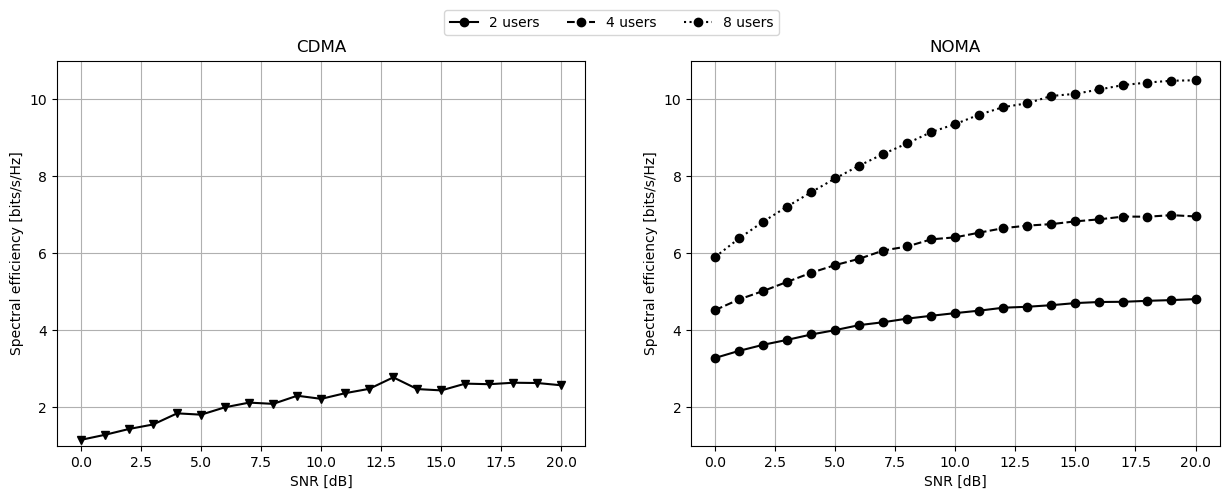

In [12]:
# Spectral efficiency as a function of the number of users

# Load data
# CDMA

# NOMA
spectral_efficiency_noma_2_users = np.load("data/NOMA/spectral_efficiency_users.npy")[1]
spectral_efficiency_noma_4_users = np.load("data/NOMA/spectral_efficiency_users.npy")[2]
spectral_efficiency_noma_8_users = np.load("data/NOMA/spectral_efficiency_users.npy")[3]

# Plot the data
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(snr_db, spectral_efficiency_cdma,  "v-", label="CDMA", color="black")
plt.xlabel("SNR [dB]")
plt.ylabel("Spectral efficiency [bits/s/Hz]")
plt.grid()
plt.ylim([1, 11])
plt.title("CDMA")

plt.subplot(1, 2, 2)
plt.plot(snr_db, spectral_efficiency_noma_2_users,  "o-", label="2 users", color="black")
plt.plot(snr_db, spectral_efficiency_noma_4_users,  "o--", label="4 users", color="black")
plt.plot(snr_db, spectral_efficiency_noma_8_users,  "o:", label="8 users", color="black")
plt.xlabel("SNR [dB]")
plt.ylabel("Spectral efficiency [bits/s/Hz]")
plt.grid()
plt.title("NOMA")
plt.ylim([1, 11])
plt.legend(loc="upper center", bbox_to_anchor=(-0.15, 1.15), ncol=3)

plt.savefig("data/Comparison/spectral_efficiency_users.pdf", format="pdf")
plt.show()